# Exploration of Prosper Loan Dataset 
## by Paul Ajogi

## Investigation Overview

This project is aimed at exploring a dataset known as the Prosper Loan Dataset. The Prosper Loan Dataset is a dataset that contains data of the loan platform known as '<a href="https://www.prosper.com/">Prosper</a>'. This dataset contains information about the actual loan, the borrower (e.g Borrower's State, Occupation, Employment Status and more ) and some information about the lender/Investors e.g (Lender's Yield).  


## Dataset Overview

This dataset of prosper loan data contains 113937 loans with 81 variables. Majority of the variables are numerical (int and float) datatypes, while a few of them are object and boolean datatype. In Summary, the dataset contains:-

* 50 float
* 11 int
* 17 objects and
* 3 booleans

The datasets was further sliced into a smaller dataframe called vars_of_interest containing just the variables of interest for our analysis. The vars_of_interest consists of 11 variables of which 7 are float, 1 is an int and 3 are of object type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load datasets into a pandas dataframe
prosper_loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
#load datasets into a pandas dataframe
prosper_loan_df = pd.read_csv('prosperLoanData.csv')

In [4]:
#Make a copy of the dataframe
prosper_copy = prosper_loan_df.copy()

In [5]:
#Change the name of ListingCategory (numeric) to ListingCategory 
prosper_copy.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)

In [6]:
#Change the datatype from Int to string 
prosper_copy['ListingCategory'] = prosper_copy['ListingCategory'].astype('str')

In [7]:
#Change the ListingCategories from the numeric values to their actual categories.
""" The category of the listing the borrower selected when posting their listing 0 - Not Available"""


prosper_copy.loc[prosper_copy['ListingCategory'] == '0', ['ListingCategory']] = "Not Available"
prosper_copy.loc[prosper_copy['ListingCategory'] == '1', ['ListingCategory']] = "Debt Consolidation"
prosper_copy.loc[prosper_copy['ListingCategory'] == '2', ['ListingCategory']] = "Home Improvement"
prosper_copy.loc[prosper_copy['ListingCategory'] == '3', ['ListingCategory']] = "Business"
prosper_copy.loc[prosper_copy['ListingCategory'] == '4', ['ListingCategory']] = "Personal Loan"
prosper_copy.loc[prosper_copy['ListingCategory'] == '5', ['ListingCategory']] = "Student Use"
prosper_copy.loc[prosper_copy['ListingCategory'] == '6', ['ListingCategory']] = "Auto"
prosper_copy.loc[prosper_copy['ListingCategory'] == '7', ['ListingCategory']] = "Other"
prosper_copy.loc[prosper_copy['ListingCategory'] == '8', ['ListingCategory']] = "Baby&Adoption"
prosper_copy.loc[prosper_copy['ListingCategory'] == '9', ['ListingCategory']] = "Boat"
prosper_copy.loc[prosper_copy['ListingCategory'] == '10', ['ListingCategory']] = "Cosmetic Procedure"
prosper_copy.loc[prosper_copy['ListingCategory'] == '11', ['ListingCategory']] = "Engagement Ring"
prosper_copy.loc[prosper_copy['ListingCategory'] == '12', ['ListingCategory']] = "Green Loans"
prosper_copy.loc[prosper_copy['ListingCategory'] == '13', ['ListingCategory']] = "Household Expenses"
prosper_copy.loc[prosper_copy['ListingCategory'] == '14', ['ListingCategory']] = "Large Purchases"
prosper_copy.loc[prosper_copy['ListingCategory'] == '15', ['ListingCategory']] = "Medical/Dental"
prosper_copy.loc[prosper_copy['ListingCategory'] == '16', ['ListingCategory']] = "Motorcycle"
prosper_copy.loc[prosper_copy['ListingCategory'] == '17', ['ListingCategory']] = "RV"
prosper_copy.loc[prosper_copy['ListingCategory'] == '18', ['ListingCategory']] = "Raxes"
prosper_copy.loc[prosper_copy['ListingCategory'] == '19', ['ListingCategory']] = "Vacation"
prosper_copy.loc[prosper_copy['ListingCategory'] == '20', ['ListingCategory']] = "Wedding Loans"

In [8]:
#List of variables of interest
interest = ['LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory', 'EmploymentStatus', 'CurrentCreditLines',
           'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'TotalProsperLoans', 'ProsperPrincipalBorrowed', 
            'LP_InterestandFees']

In [9]:
#Sliced Dataframe
vars_of_interest = prosper_copy[interest]

## Loan Status Count in percentage

Close to half of the LoanStatus are Current status, majurity of the loans borrowed are still within the period of their term. The remaining half is dominated by loans that are completed, chargedoff and Defaulted with 33.417%, 10.525% and 4.404% respectively. The remaining categories, Past Due, FinalPaymentInProgress and Cancelled have the least count with their cummulative percentage not up to 2.000%.

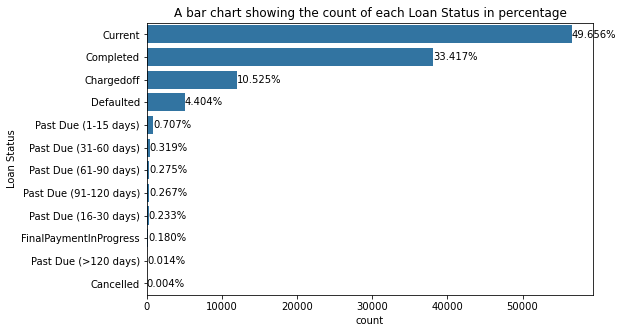

In [10]:
#Plot the bar horizontally and show the percentage beside each bar
base_color = sb.color_palette()[0]
order = vars_of_interest['LoanStatus'].value_counts().index
counts = vars_of_interest['LoanStatus'].value_counts()

loan_number = vars_of_interest.shape[0]
plt.figure(figsize = [8,5]);

sb.countplot(data = vars_of_interest, y = 'LoanStatus', color = base_color, order = order);
plt.title('A bar chart showing the count of each Loan Status in percentage');
plt.ylabel('Loan Status');

for i in range(counts.shape[0]):
    count = counts[i]
    percentage = '{:0.3f}%'.format(100*count/loan_number)
    plt.text(count+1, i, percentage, va = 'center');

## Distribution of Borrower's Rate

The Borrower Rate is seen to be unimodal and slightly scewed to the right. When the bins were adjusted, we discovered some high spikes down the right side of the distribution.

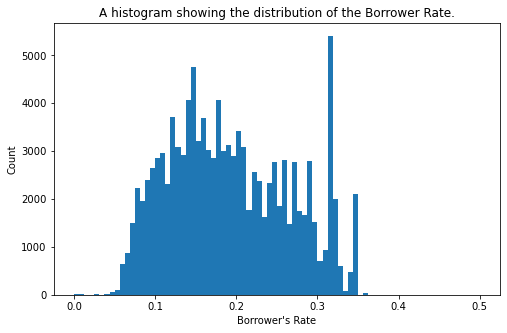

In [11]:
#Adjust binsize
binsize = 0.00625
bins = np.arange(0, vars_of_interest['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(vars_of_interest['BorrowerRate'], bins = bins);
plt.title('A histogram showing the distribution of the Borrower Rate.');
plt.xlabel('Borrower\'s Rate');
plt.ylabel('Count');

## Loan Status vs Borrower's Rate

The Completed, Current and FinalPaymentInProgress Status shows lower median that is below 0.2(20% Borrower's Rate) while the rest of the categories have higher median that is approximately 0.25(25% Borrower's Rate). This gives an impression that the positive outcomes of the LoanStatus (eg. Completed, FinalPaymentInProgress) are characterised with lower Borrower's Rate while the negative outcomes (e.g Defaulted, Past Due) are characterised with higher Borrower's Rate.

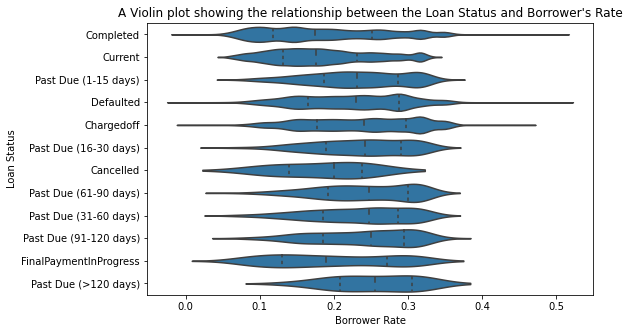

In [12]:
plt.figure(figsize = [8,5])
sb.violinplot(data = vars_of_interest, y = 'LoanStatus', x = 'BorrowerRate', color= base_color, inner = 'quartiles' );
plt.title('A Violin plot showing the relationship between the Loan Status and Borrower\'s Rate');
plt.ylabel('Loan Status');
plt.xlabel('Borrower Rate');

## Borrower's Rate vs Borrower's APR

The scatter plot between the BorrowerRate and BorrowerAPR shows a positive corrolation between them. This indicates that, as the BorrowerRate increases the BorrowerAPR increases as well.

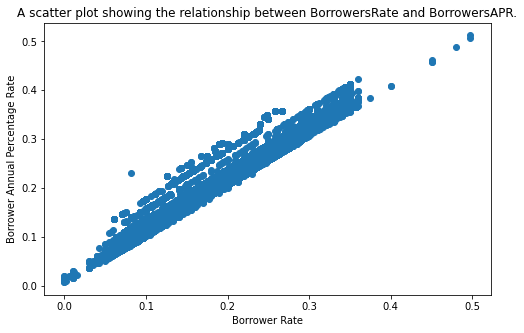

In [13]:
plt.figure(figsize = [8,5]);
plt.scatter(data = vars_of_interest, x = 'BorrowerRate', y = 'BorrowerAPR');
plt.xlabel('Borrower Rate');
plt.ylabel('Borrower Annual Percentage Rate');
plt.title('A scatter plot showing the relationship between BorrowersRate and BorrowersAPR.');

## Borrower's Rate vs Borrower's APR by Loan Status

For each category of Loan Status, the Borrower APR increases as the Borrower Rate increases. We can say that, they are positively corrolated for each category of LoanStatus.

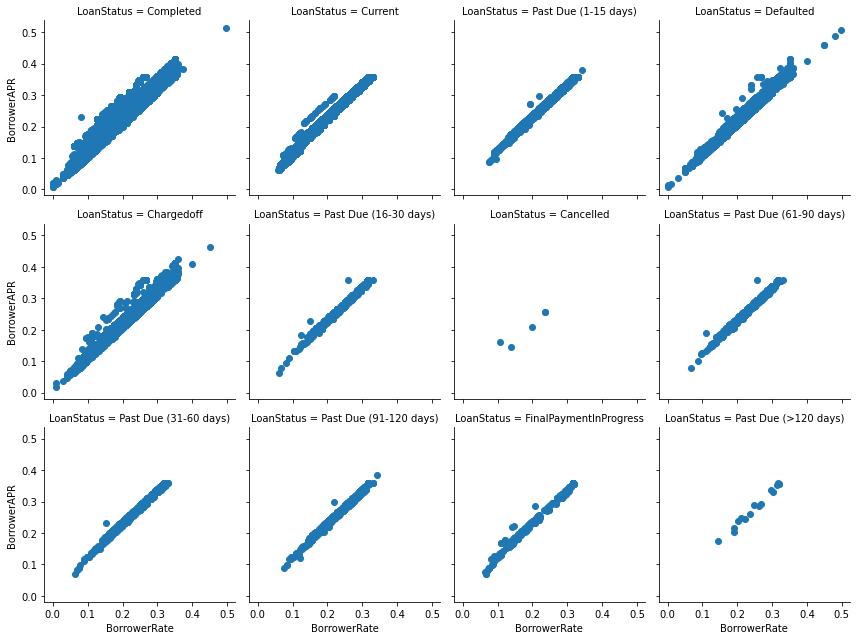

In [14]:
g = sb.FacetGrid(data = vars_of_interest, col = 'LoanStatus', col_wrap = 4);
g.map(plt.scatter, 'BorrowerRate', 'BorrowerAPR' );

In [15]:
!jupyter nbconvert Part_II_Loans_explanatory.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Loans_explanatory.ipynb to slides
[NbConvertApp] Writing 782618 bytes to Part_II_Loans_explanatory.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C